Data Science Project on Tobacco Use and Mortality Prediction Model


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:\Users\joyal\OneDrive\Desktop\Tobacco Use and Mortality Prediction Model\fatalities.csv')

# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

# Fill missing values or drop rows/columns as necessary
df.fillna(method='ffill', inplace=True)  # Example method


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             1749 non-null   int64 
 1   ICD10 Code       1749 non-null   object
 2   ICD10 Diagnosis  1749 non-null   object
 3   Diagnosis Type   1749 non-null   object
 4   Metric           1749 non-null   object
 5   Sex              1166 non-null   object
 6   Value            1749 non-null   object
dtypes: int64(1), object(6)
memory usage: 95.8+ KB
None
Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                583
Value                0
dtype: int64


C:\Users\joyal\AppData\Local\Temp\ipykernel_19420\390088614.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Example method


              Year
count  1749.000000
mean   2009.000000
std       3.163182
min    2004.000000
25%    2006.000000
50%    2009.000000
75%    2012.000000
max    2014.000000


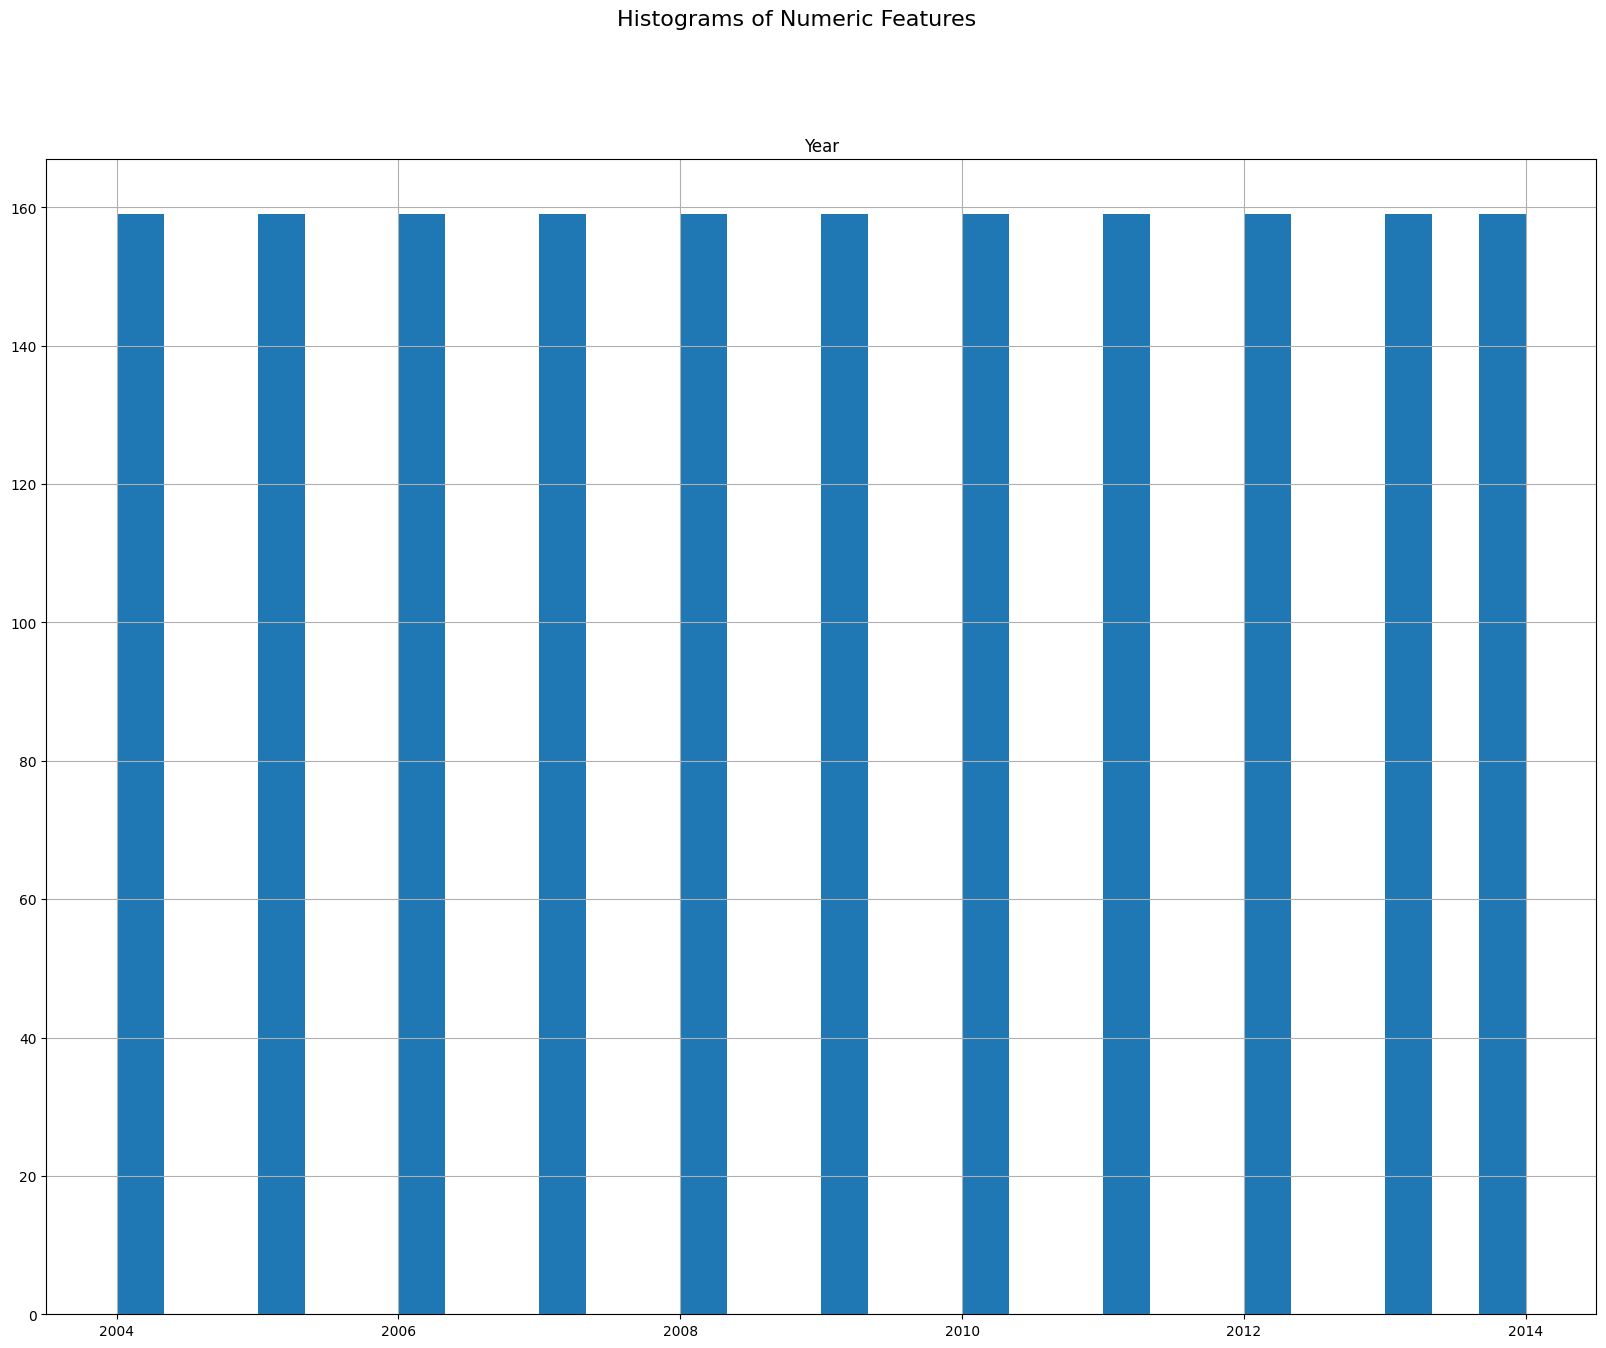

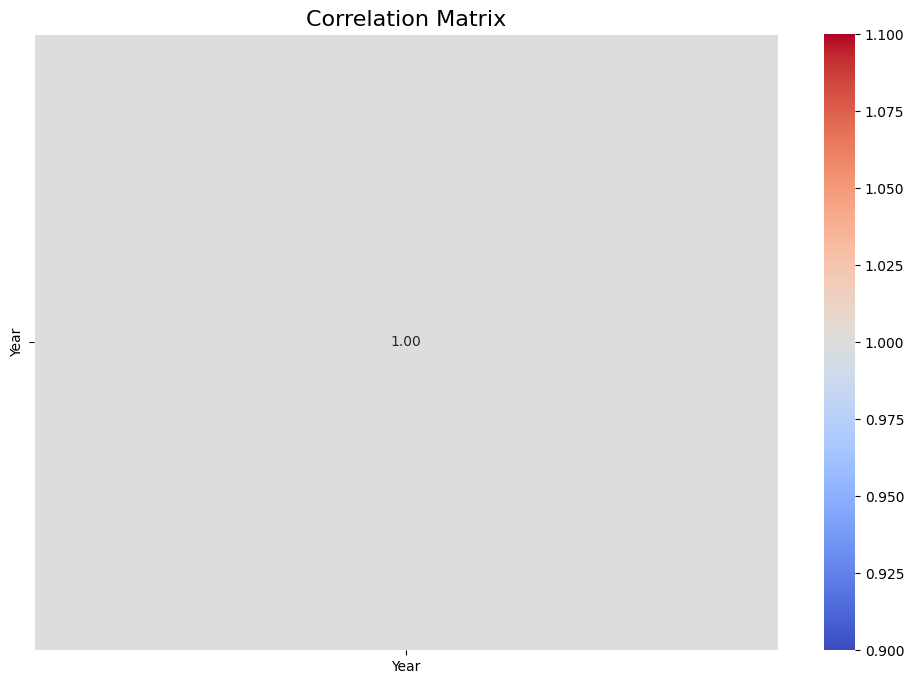

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic statistics
print(df.describe())

# Histograms for numeric features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features', fontsize=16)  # Title for histograms
plt.show()

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)  # Title for heatmap
plt.show()



              Year
count  1749.000000
mean   2009.000000
std       3.163182
min    2004.000000
25%    2006.000000
50%    2009.000000
75%    2012.000000
max    2014.000000


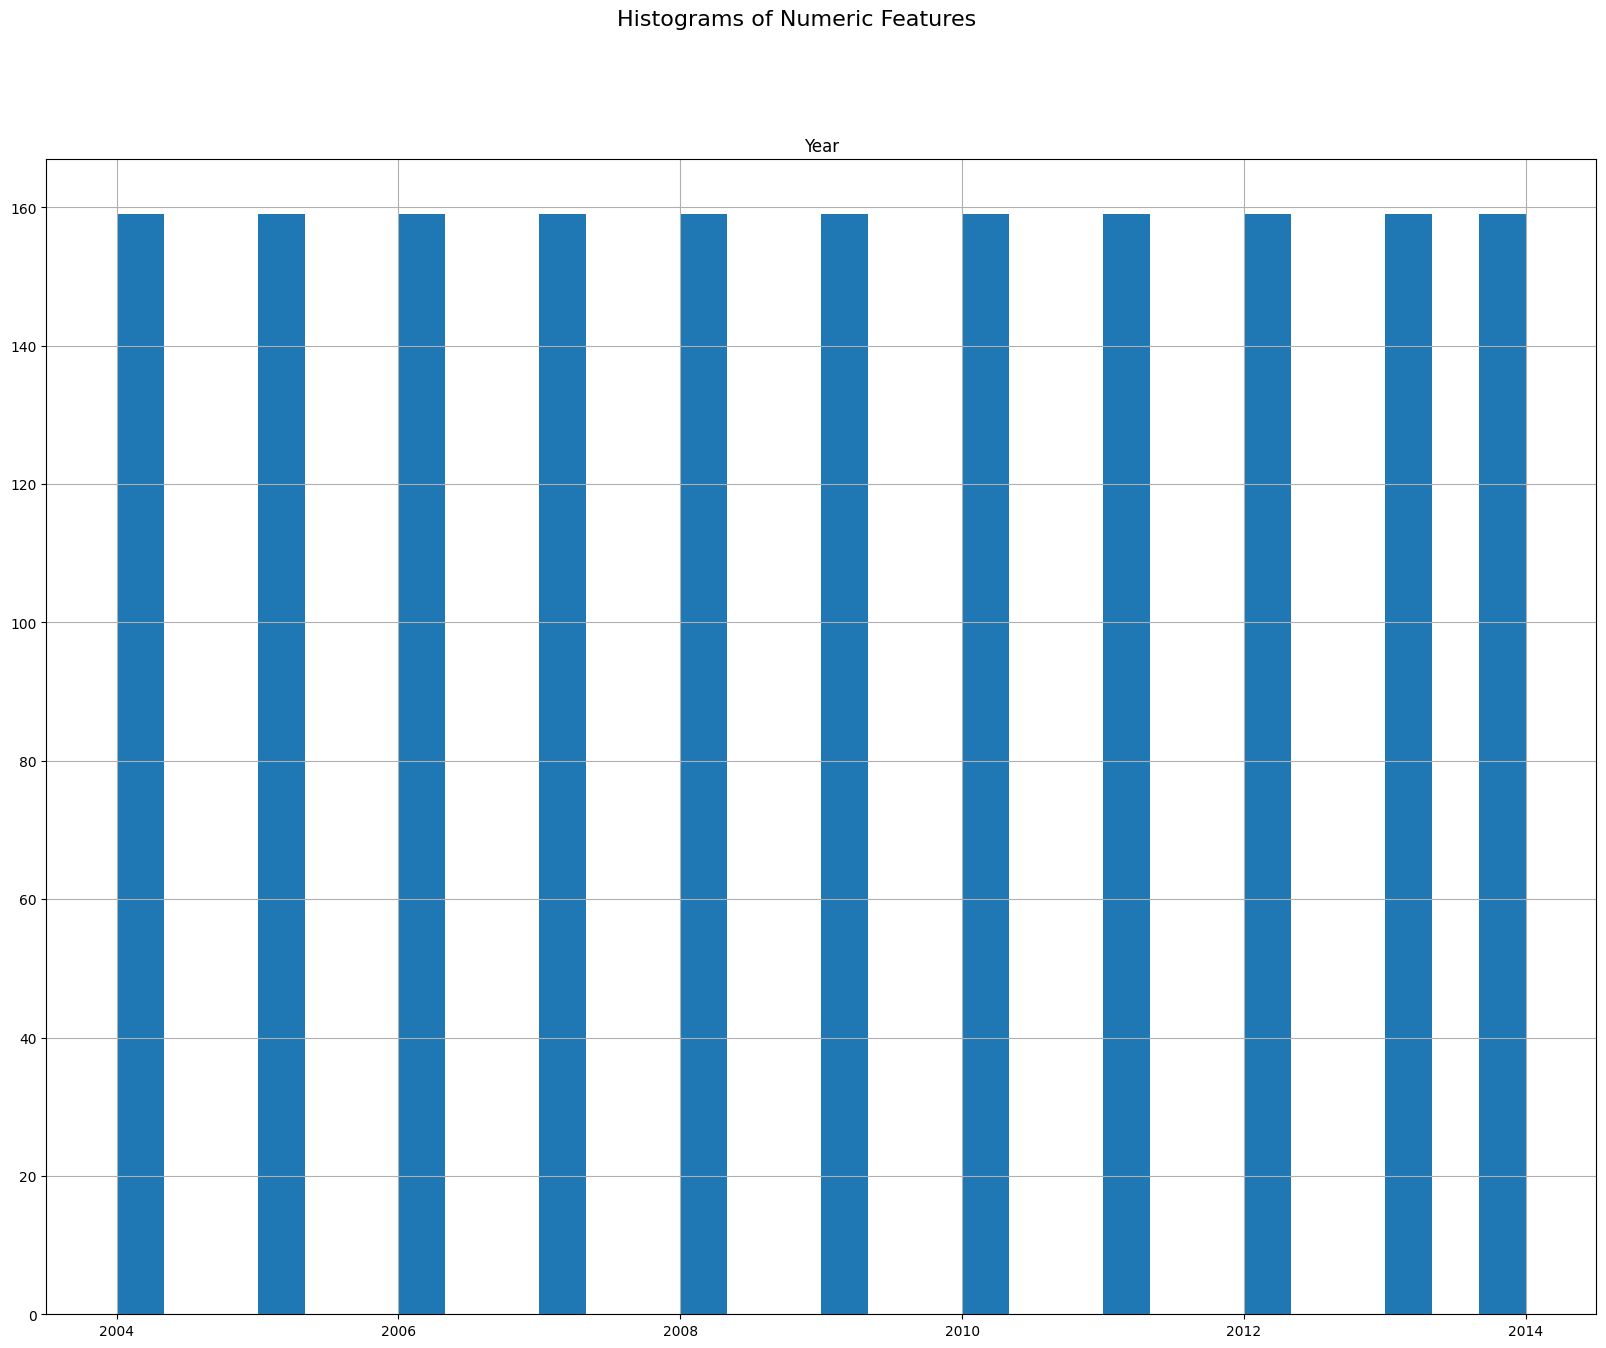

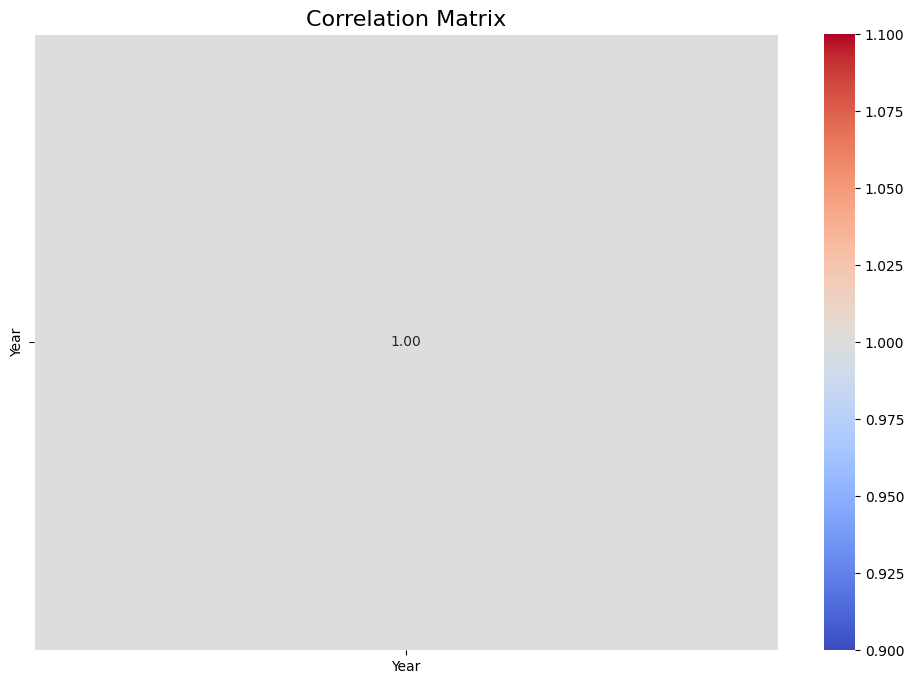

In [9]:
# One-hot encoding for the 'Sex' column (since 'Method' doesn't exist)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Basic statistics
print(df.describe())

# Histograms for numeric features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.show()

# Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()



In [13]:
print(df.columns)


Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Value', 'Sex_Male'],
      dtype='object')


In [15]:
df = df.drop('Sex_Male', axis=1)





In [23]:
from sklearn.preprocessing import LabelEncoder

# Convert target variable 'Value' to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Value'])  # This will encode the target variable into integers

# Encode all ICD10 Diagnosis columns
df = pd.get_dummies(df, columns=[col for col in df.columns if 'ICD10 Diagnosis' in col], drop_first=True)

# Define features and target variable
X = df.drop(['Value'], axis=1)  # 'Value' is your target column

# Check class distribution
print(f"Class distribution in target 'Value':\n{y.value_counts()}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train = X_train[numerical_cols]
X_test = X_test[numerical_cols]

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()

# Fit the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Predict using the models
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)

# Get predicted probabilities for ROC AUC
log_reg_pred_prob = log_reg.predict_proba(X_test)
rf_clf_pred_prob = rf_clf.predict_proba(X_test)

# Evaluate the models
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(f"Precision: {precision_score(y_test, log_reg_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, log_reg_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, log_reg_pred, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(y_test, log_reg_pred_prob, multi_class='ovr')}")

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_clf_pred)}")
print(f"Precision: {precision_score(y_test, rf_clf_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, rf_clf_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, rf_clf_pred, average='weighted')}")
print(f"ROC AUC Score: {roc_auc_score(y_test, rf_clf_pred_prob, multi_class='ovr')}")



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [20]:
print(df.columns)


Index(['Year', 'Diagnosis Type', 'Metric', 'Value', 'ICD10 Code_C00-C14',
       'ICD10 Code_C00-D48', 'ICD10 Code_C15', 'ICD10 Code_C16',
       'ICD10 Code_C25', 'ICD10 Code_C32', 'ICD10 Code_C33-C34',
       'ICD10 Code_C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C64-C66 & C68 & C16 & C25 & C80 & C92 & J40-J43 & J44 & J10-J18 & I00-I09 & I26-I51 & I20-I25 & I72-I78 & I60-I69 & I71 & I70 & K25-K27 & K50 & K05 & H25 & S72.0-S72.2 & O03',
       'ICD10 Code_C53', 'ICD10 Code_C64-C66 & C68', 'ICD10 Code_C67',
       'ICD10 Code_C80', 'ICD10 Code_C92', 'ICD10 Code_I00-I09 & I26-I51',
       'ICD10 Code_I00-I99', 'ICD10 Code_I20-I25', 'ICD10 Code_I60-I69',
       'ICD10 Code_I70', 'ICD10 Code_I71', 'ICD10 Code_I72-I78',
       'ICD10 Code_J00-J99', 'ICD10 Code_J10-J18', 'ICD10 Code_J40-J43',
       'ICD10 Code_J44', 'ICD10 Code_K00-K93', 'ICD10 Code_K25-K27',
       'ICD10 Diagnosis_All circulatory diseases',
       'ICD10 Diagnosis_All deaths',
       'ICD10 Diagnosis_All deaths which ca